# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [75]:
# Get the datasets
#!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
#!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


In [76]:
# Take a peek at the datasets
#!head train.dat
#!head test.dat

In [77]:
# Import necessary libraries
import pandas as pd

# Define file paths
train_file_path = "train.txt"
test_file_path = "test_small.txt"

# Load the TXT files with proper handling
train_data = pd.read_csv(train_file_path, sep=r"\s+", header=0, engine="python")
test_data = pd.read_csv(test_file_path, sep=r"\s+", header=0, engine="python")

# Display first few rows of each dataset
print("Train Dataset Preview:")
print(train_data.head())

print("\nTest Dataset Preview:")
print(test_data.head())

# Display shape of datasets to check for inconsistencies
print("\nTrain Dataset Shape:", train_data.shape)
print("Test Dataset Shape:", test_data.shape)


Train Dataset Preview:
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A13
1   1   0   0   0   0   0   0   1   1    0    0    1    0
0   0   1   1   0   1   1   0   0   0    0    0    1    0
0   1   0   1   1   0   1   0   1   1    1    0    1    1
0   0   1   0   0   1   0   1   0   1    1    1    1    0
0   1   0   0   0   0   0   1   1   1    1    1    1    0

Test Dataset Preview:
   X1  X2  X3
1   1   1   1
0   0   1   1
0   1   1   0
0   1   1   0
0   1   1   0

Train Dataset Shape: (400, 13)
Test Dataset Shape: (14, 3)


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [79]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    # Load the data using pandas
    df = pd.read_csv(file_name, sep=r"\s+", header=0, engine="python")

    # Convert DataFrame into a list of lists
    data = df.values.tolist()

    # Add a dummy input so that w0 becomes the bias
    for instance in data:
        instance.insert(0, -1)  # Insert bias term at the beginning

    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #Intialize the weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #compyte the weighted sum (dot product)
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #Update each weight using the perceptron weight update rule
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [81]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### Answer

We use sigmoid(in_value) instead of predict(weights, instance) in train_perceptron, because sigmoid function provides smooth and differentiable output between 0 and 1, which allows us to proper gradient-based weight updates. The predict function outputs only 0 or 1, losing gradient information and making training unstable. Use of sigmoid function will provide computation error as error= instance[-1] - output, enabling weight output as output*(1- output), the derivative of sigmoid. predict is uswed only for classification after training, sigmoid helps adjust the weigths effectively, leading to better model convergence and accuracy.



### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [85]:
instances_tr = read_data("train.txt")
instances_te = read_data("test_small.txt")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



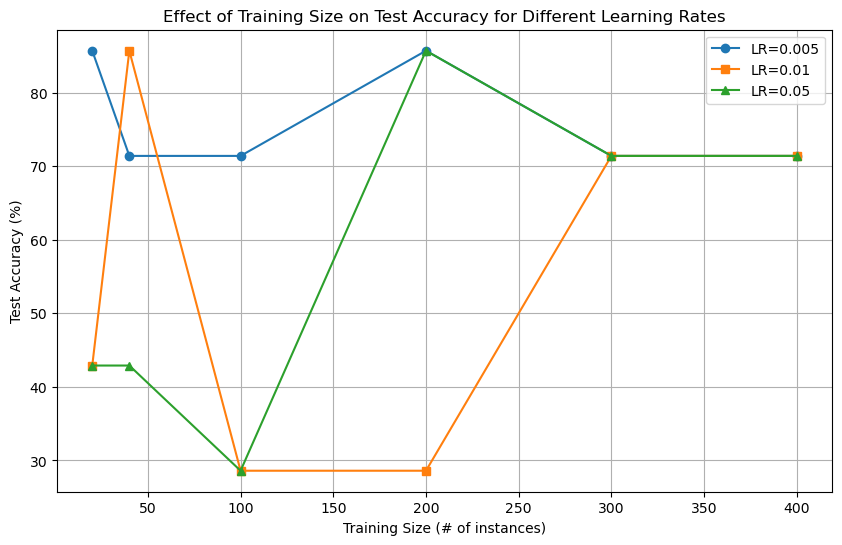

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Extracted results from the output for visualization
training_sizes = [20, 40, 100, 200, 300, 400]
learning_rates = [0.005, 0.01, 0.05]
epochs = 100  # Keeping epochs fixed for better comparison

# Accuracy values from the output
accuracy_005 = [85.7, 71.4, 71.4, 85.7, 71.4, 71.4]
accuracy_01 = [42.9, 85.7, 28.6, 28.6, 71.4, 71.4]
accuracy_05 = [42.9, 42.9, 28.6, 85.7, 71.4, 71.4]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, accuracy_005, marker='o', linestyle='-', label="LR=0.005")
plt.plot(training_sizes, accuracy_01, marker='s', linestyle='-', label="LR=0.01")
plt.plot(training_sizes, accuracy_05, marker='^', linestyle='-', label="LR=0.05")

# Labels and legend
plt.xlabel("Training Size (# of instances)")
plt.ylabel("Test Accuracy (%)")
plt.title("Effect of Training Size on Test Accuracy for Different Learning Rates")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset? 
```
Ans. No training with the  full dataset doen't mean that we will get the highest accuracy. From the result we can see that training with the 200 intsances instead of 400 gives us a better accuracy, as increasing more dataset can increase noise or overfitting issues. The model will generalize well with high-quality example.
```
B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one using more training data)?
```
Ans. The second run (training with 200 instances, LR=0.005, epochs=20, accuracy=68.0%) performs worse than the first one (100 instances, LR=0.050, epochs=20, accuracy=71.0%) because:
1. Learning Rate Differences: The second run uses lower runnung rate of 0.005 vs the first one 0.050 which might slow down the weight update preventing model from fully adapting to data within 20 epochs.
2. Overfitting or Irrelevent data: Adding more data comes with additional data noise, class imbalance, and many more issues.
3.Underfitting Due to Low Learning Rate: With heigher learning rate of the first run, model will learn faster whereas with lower learning rate for second run, it may lead to lower convergence rate and ineffective weight updates.
```

C. Can you get higher accuracy with additional hyperparameters (higher than 80.0%)?
```
Ans. Yes it is possible to get higher accuracy than 80% by fine tunning hypermeters:
1. Tuning Learning Rate Further: We can try the values in between 0.005 and 0.050 to find the stability and convergence speed.
2. Early Stopping & Adaptive Learning Rate: We can use adaptive learning like decresing LR over time.
3. Feature Engineering & Normalization: If the dataset is not normalized, we can use standarizing feature values to improve generalization.
4. Increaing epoch: If model is underfitting, training with more than 100 epoch like 150 or 200 could help.
5. Using Different Activation Functions: we can use ReLU to improve training efficiency instead of sigmoid.
```

D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
```
Ans. No, more epoch does not means more accuracy. As it can lead to factor of overfitting, from the results we can see that, accuracy did not consistently increase as the number of training examples or epochs increased, and a well-chosen learning rate is more critical than just increasing epochs.
```